# **データの確認**
精度の良いモデルを作るためにはは、学習データの状況を正確に確認すことが必須

確認方法

・データフレームの機能を使って**数値的・統計的に分析する方法**

 欠損値の調査, 項目値の個数カウント, 平均・標準偏差の調査など

 ・matlplotlibやseabornのグラフ描画機能を使って**視覚的に分析・確認する方法**

 項目毎のヒストグラム表示や2項目の関係調査のための散布図表示など


In [ ]:
# 日本語化ライブラリの導入

!pip install japanize-matplotlib | tail -n 1

# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# ライブりのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#matplotlibの日本語化対応
import japanize_matplotlib

#データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# NumPyの不動招集点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
#データフレームで全ての項目を表示
pd.set_option("display.max_columns", None)
#グラフのデフォルトフォントの指定
plt.rcParams["font.size"] = 14
#乱数の種
random_seed = 123

In [ ]:
#  タイタニックデータセットの利用
import seaborn as sns

# サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

# 項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', '両親子供数', '料金', '乗船港コード', '等室名', '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']
df_titanic.columns = columns_t

# データの内容
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


データの内容

生存(survival) : (0 = 死亡, 1 = 生存) \\
等室(pclass) : (1 = 1等船室,  2 = ２等船室, 3 =３等船室) \\
性別(sex) : ( male = 男性, female = 女性) \\
年齢(age) \\
兄弟配偶者数(sibsp) : 同乗している兄弟と配偶者の数 \\
両親子供数(parch) : 同乗している両親と子供の数 \\
料金(fare) \\
乗船コード (embarked) : (C=Cherbourg, Q=Queenstown, S=Southanmpton) \\
等室名(class) : (First = １等船室, Second=２等船室 Third=３等船室) \\
男女子供(who) : (man = 男 women =女 child=子供)
成人男子(adult_male) : True / False
デッキ(deck) : 船室番号の頭文字(AからG)
乗船港(embark_town) : Southampton/Cherbourg/ Queenstown
生存可否(alive) : yes/no
独身(alone) : True/False


In [ ]:
# データの欠損値の調査
print(df_titanic.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64


In [ ]:
# 項目「乗船港」の項目値ごとの個数
print(df_titanic['乗船港'].value_counts())
print()

#　項目「生存可否」の項目値ごとの個数
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


統計情報の調査

数値のデータ項目に対して、平均・分散・個数・最大値・最小値を調べる \\
describe関数を利用する \\
count (データ件数), mean (平均値）, std(標準偏差), min(最小値）,  \\
25%(25パーセンタイル値）, 50% (50パーセントタイル値）, 75% \\
(75パーセントタイル値), max (最大値）

In [ ]:
display(df_titanic.describe())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


集約関数の利用

 男性と女性での統計情報を知りたいとき

In [ ]:
display(df_titanic.groupby('性別').mean())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


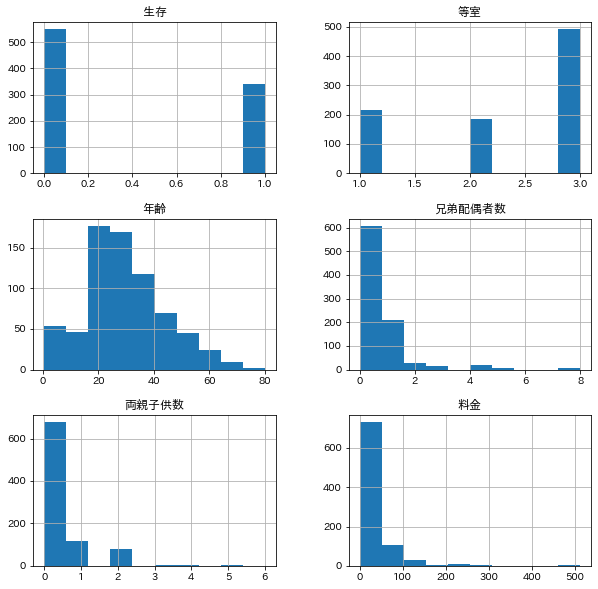

In [ ]:
# 分析対象項目のグラフ表示 (数値項目の場合)

# 数値項目の定義
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

#グラフ描画領域の調整
plt.rcParams['figure.figsize']= (10, 10)

#データフレームの数値項目でヒストグラム表示
df_titanic[columns_n].hist()
plt.show()

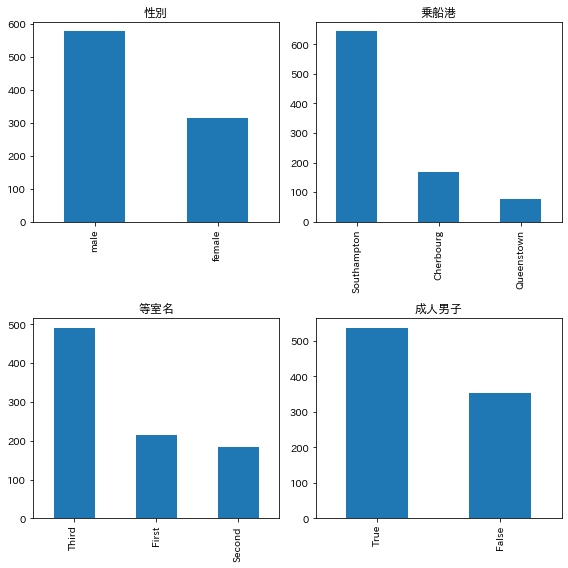

In [ ]:
# 分析対象項目のグラフ表示　(非数値項目の場合)

#　グラフ化対象列の定義
columns_c = ['性別', '乗船港', '等室名', '成人男子']

# グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (8, 8)

# ループ処理で、ヒストグラムを表示
for i, name in enumerate(columns_c):
  ax = plt.subplot(2, 2, i+1)
  df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)

#　レイアウトの調整
plt.tight_layout()
plt.show()

## 視覚的に分析する方法

　例　：　アイリスデータセット　　\\

　アヤメの花の「がく片」(sepal)と「花びら」(petal)の長さ・幅を測定した結果 \\

 ・がく片長　（sepal_lentgth) \\
 ・がく片幅 (sepal_width) \\
 ・花弁長 (petal_length)
 ・花弁幅　(petal_width)
 ・種別 (specied) : versicolor/setosa/virginica




In [ ]:
# 追加ライブラリの import
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 項目名の日本語化
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# データの内容
display(df_iris.head())

,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


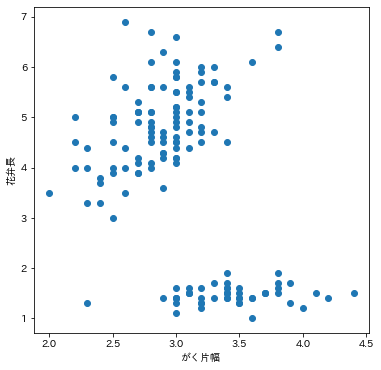

In [ ]:
# 散布図の表示　matplotlib版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

# 散布図の表示
plt.scatter(df_iris['がく片幅'], df_iris['花弁長'])

# ラベルの表示
# sepal　がく　petal 花弁
plt.xlabel('がく片幅')
plt.ylabel('花弁長')
plt.show()

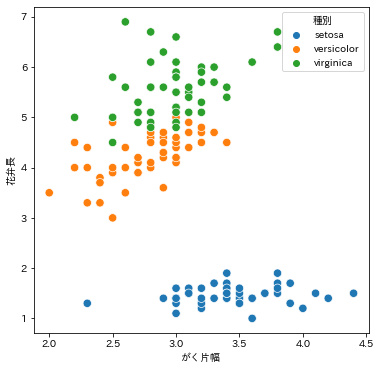

In [ ]:
# 散布図の表示　seaborn版　(1)

plt.figure(figsize=(6,6))
sns.scatterplot(x='がく片幅', y='花弁長', hue='種別', s=70, data=df_iris)
plt.show()

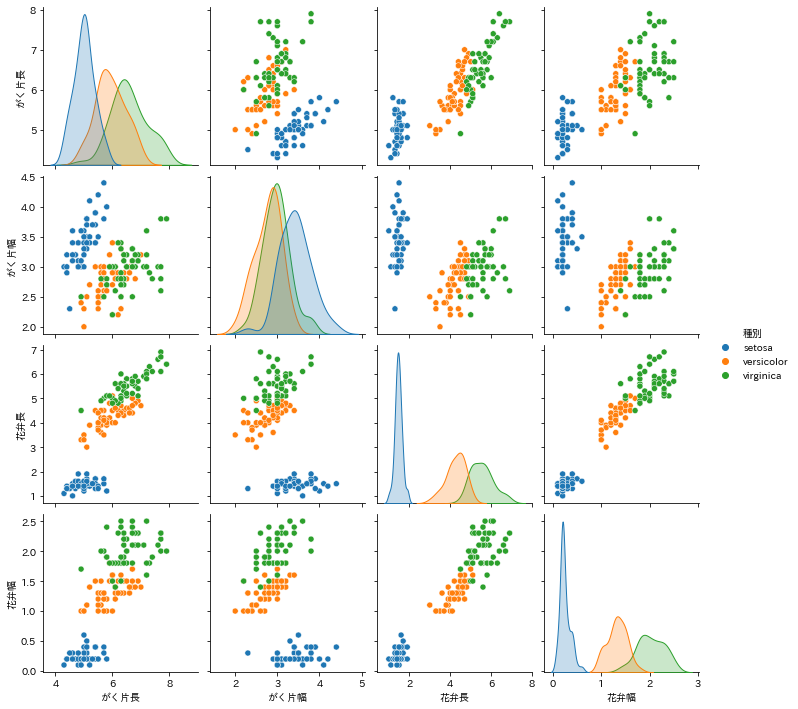

In [ ]:
# 全散布図同時表示

sns.pairplot(df_iris, hue="種別")
plt.show()

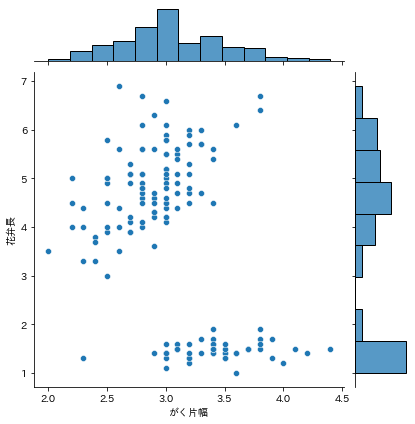

In [ ]:
#  散布図の表示　seaborn版 (2)

sns.jointplot('がく片幅', '花弁長', data=df_iris)
plt.show()

## 箱ひげ図の利用

---
 
  統計情報で示した最小値, 最大値, ２５パーセンタイル値, 50パーセントタイル値 (中央値), 75パーセンタイル値の５つの統計的な値を利用する。

  　中央値(50パーセンタイル値）から25パーセンタイル値と75パーセンタイル値で囲まれた領域の長さから1.5倍を超えた値ははずれ値として除く手法である 





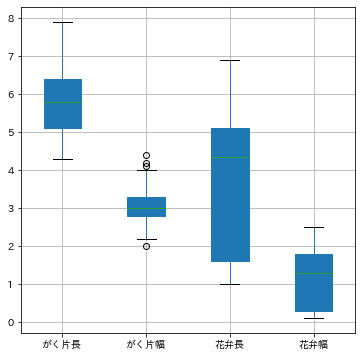

In [ ]:
# 箱ひげ図表示 matplotlib版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

#箱ひげ図の描画
df_iris.boxplot(patch_artist=True)
plt.show()

seabornを使った箱ひげ図表示

seabonのboxplot関数を利用するためには、元データをvariable(項目名）, value(値）の形式

にする必要がある. 

In [ ]:
# melt 関数によるデータの事前加工
w = pd.melt(df_iris, id_vars=['種別'])

# 加工結果の確認
display(w.head())

,種別,variable,value
0,setosa,がく片長,5.1000
1,setosa,がく片長,4.9000
2,setosa,がく片長,4.7000
3,setosa,がく片長,4.6000
4,setosa,がく片長,5.0000


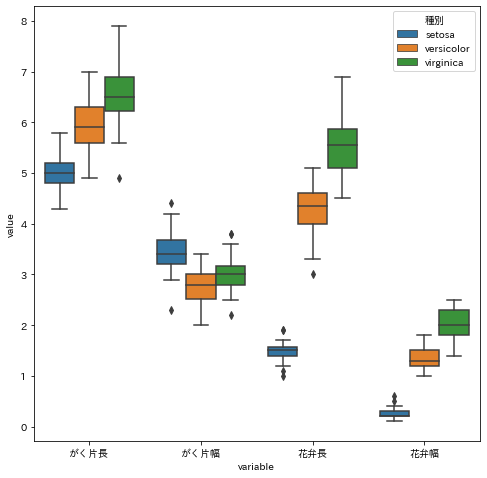

In [ ]:
# sebornによる箱ひげ図表示

# hueパラメータを追加し, 花の種類で箱ひげ図をかき分ける
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=w, hue='種別')
plt.show()

# データの前処理

---
 対象データの選択とデータ読み込み

 　例　：　タイタニックデータ

　　　処理１　不要なデータの削除

　例　：　等室（pclass)と等室名(class), 乗船港コー(embarked)と乗船港(embarked_town), \\
生存(survived)と生存可否(alive)はそれぞれ同じ意味をしている
      
  **同じ情報量のデータ項目が複数あると、精度はかえって落ちる**

In [ ]:
# 余分な列の削除

# 「等室名」（「等室」と同じ) axis=0 垂直方向（行方向), axis=1　水平方向（列方向）, valuesが全体
df1 = df_titanic.drop('等室名', axis=1)

# 「乗船港」（「乗船港コード」と同じ）　　
# 使いやすいデータの方を残しておく
df2 = df1.drop('乗船港', axis=1)

#「生存可否」（「生存」と同じ）
df3 = df2.drop('生存可否', axis=1)

#結果確認
display(df3.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


In [ ]:
# 欠損値への対応

# 欠損値の確認
display(df3.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
男女子供        0
成人男子        0
デッキ       688
独身          0
dtype: int64

「年齢」, 「乗船コード」, 「デッキ」の３つに欠損値が存在する

このうち, 「乗船港コード」に関しては、欠損値は2件だけ

学習データが 891件のため　欠損値対策として行を削除するのがよい

しかし、年齢は、177件もあるので、全ての行を削除するとデータの量を大幅に減らしてしまう。

そのため, 年齢のような数値データは該当項目の平均値を利用する（中央値でも良い）

「デッキ」に関しては、大きな欠損値なので、もう少し調べる必要がある


In [ ]:
display(df3['デッキ'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: デッキ, dtype: int64

## 対応策

 **乗船コード** : 欠損行数が２行と少ない　→　行ごと削除する

 **年齢** : 数値データであり, 欠損桁数が177行とかなり多い \\
     →　データの平均値で代用

 **デッキ**  :  ラベル値データであり、欠損行数が688行と相当多い \\
   →　欠損を意味するダミーコードを振って全行の処理対象にする

In [ ]:
# 乗船港コード　の対応

# dropna関数を利用する
df4 = df3.dropna(subset = ['乗船港コード'])

# 年齢の対応
age_average = df4['年齢'].mean()

#fillna関数の利用
df5 = df4.fillna({'年齢': age_average})

#デッキの対応
# replace関数の利用（ダミーコードは'N’とする)
df6 = df5.replace({'デッキ':{np.nan: 'N'}})

In [ ]:
# 結果の確認
display(df6.isnull().sum())

display(df6.head())

生存        0
等室        0
性別        0
年齢        0
兄弟配偶者数    0
両親子供数     0
料金        0
乗船港コード    0
男女子供      0
成人男子      0
デッキ       0
独身        0
dtype: int64

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,N,True


## ２値ラベルの数値化

　ラベル値を数値データに変換して, コンピュータ上で使いやすくする

 例: 性別 (male / femal), 成人男子 (True/False),  独身(True / False)

  male  →　1,   femal →　0

  True → 1,  False →　０

  　とする

In [ ]:
# 辞書 mf_mapの定義
mf_map = {'male': 1, 'female': 0}

# map関数を利用して数値化
df7 = df6.copy()
df7['性別'] = df7['性別'].map(mf_map)

#結果確認
display(df7.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,N,True


In [ ]:
#辞書　tf_mapの定義
tf_map = {True : 1, False: 0}

# map関数を離昇して数値化
df8 = df7.copy()
df8['成人男子'] = df8['成人男子'].map(tf_map)

# map関数を離昇して数値化
df9 = df8.copy()
df9['独身'] = df9['独身'].map(tf_map)

#結果確認
display(df9.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,1,N,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,N,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,N,1


One-Hot　エンコーディング

　種類が３個以上ある立ラベルを数値化する方法

　**それぞれのラベルに対応した列を新しくつくり、該当する項目は1を関係ない項目は値０を割り当てる手法**

　get_dummies関数を利用

In [ ]:
# get_dummies関数の利用サンプル

w = pd.get_dummies(df9['男女子供'], prefix='男女子供')
display(w.head(10))

,男女子供_child,男女子供_man,男女子供_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [ ]:
# get_dummies関数でカトゴリ値をon hot vectorに展開する関数を定義
# df対象データフレーム
# column対象列

def enc(df, column):
  # One Hot Vector生成
  df_dummy = pd.get_dummies(df[column], prefix=column)
  #元列の削除
  df_drop = df.drop([column], axis=1)
  #削除したデータフレームと、One Hot生成列を連結
  df1 = pd.concat([df_drop, df_dummy], axis=1)
  return df1

In [ ]:
# 項目値の確認
display(df9['男女子供'].value_counts())

man      537
woman    269
child     83
Name: 男女子供, dtype: int64

In [ ]:
# One-Hotエンコーディング

#男女子供
df10 = enc(df9, '男女子供')

# 結果確認
display(df10.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,成人男子,デッキ,独身,男女子供_child,男女子供_man,男女子供_woman
0,0,3,1,22.0000,1,0,7.2500,S,1,N,0,0,1,0
1,1,1,0,38.0000,1,0,71.2833,C,0,C,0,0,0,1
2,1,3,0,26.0000,0,0,7.9250,S,0,N,1,0,0,1
3,1,1,0,35.0000,1,0,53.1000,S,0,C,0,0,0,1
4,0,3,1,35.0000,0,0,8.0500,S,1,N,1,0,1,0


In [ ]:
#　One-Hotエンコーディング

# 乗船港コード
df11 = enc(df10, '乗船港コード')

# デッキ
df12 = enc(df11, 'デッキ')

#　結果確認
display(df12.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


### 正規化

 normalization : 入力変数xを、最小値が0, 最大値が１になるように１次関数を使って変換

 xの最大値を x_max, 最小値をx_minとした時

 $ \hat{x} = \frac{x - x_{min}}{x_{max} - x_{min}} $

 この変換式の結果、x = x_maxの時に１の値を, x=x_minの時に0の値になる

 standardization : 入力変数xが平均0, 分散1の正規分布になるように１次関数を使って変換

 xの平均をm, 標準偏差を$\sigma$とした時

 $\hat{x} = \frac{x-m}{\sigma}$

In [ ]:
# standardization
df13 = df12.copy()
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df13[['年齢', '料金']] = stdsc.fit_transform(df13[['年齢', '料金']])

#結果確認
display(df13.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,-0.5896,1,0,-0.5002,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0.6448,1,0,0.7889,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,-0.2810,0,0,-0.4866,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0.4134,1,0,0.4229,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,0.4134,0,0,-0.4841,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
